<a href="https://colab.research.google.com/github/dyutivartak/ML-II_Pracs/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install shap xgboost
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
np.random.seed(123)
import shap
shap.initjs()
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Training XG Boost

In [3]:
y=df['target'].to_frame() # define Y 
X=df[df.columns.difference(['target'])] # define X 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test 

In [4]:
model = XGBClassifier(random_state=42,gpu_id=0) # build classifier Gradient Boosted decision trees
model.fit(X_train,y_train.values.ravel())

XGBClassifier(gpu_id=0, random_state=42)

In [5]:
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


Shap explainer

In [7]:
explainer = shap.TreeExplainer(model)

Storing Shap expected value

In [8]:
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

Explaining XGBoost AI using Shap explainer

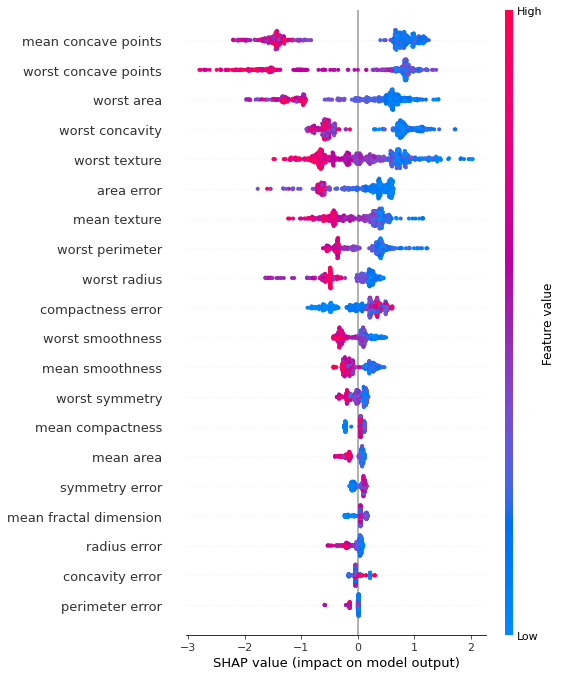

In [9]:
shap.summary_plot(shap_values, X,title="SHAP summary plot")

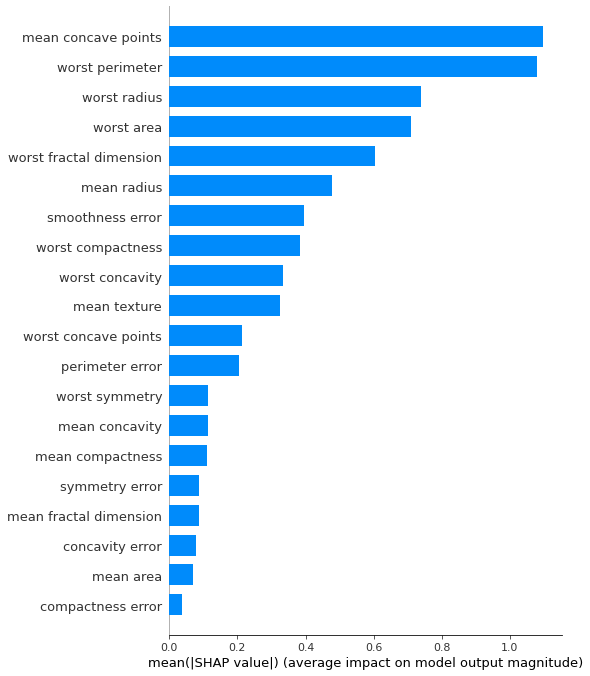

In [10]:
shap.summary_plot(shap_values, X,plot_type="bar", feature_names=data.feature_names , show=True)